In [72]:
import pandas as pd
import sys
import numpy as np
import pathlib as pl
sys.path.append('../dependencies/')
import pyemu
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
curr_model = '01473000'
wkdir = pl.Path(f'../NHM_extractions/20230110_pois_haj/{curr_model}/')
results_dir = pl.Path('../example_data/')

In [3]:
fig_dir = pl.Path(wkdir / 'figures' / 'prior')
if not fig_dir.exists():
    fig_dir.mkdir(parents=True)

In [29]:
datfmtmon = '%Y_%m'
datfmtdaily = '%Y_%m_%d'

## need pst file to get observation data

In [5]:
pst = pyemu.Pst(str(wkdir / 'prior_mc_better.pst'))

error parsing metadata from 'obsnme', continuing


In [6]:
obs = pst.observation_data

In [73]:
obs.loc[obs.obsval==-9999,'obsval']=np.nan

## look at a histogram of PHI

In [8]:
phi = pd.read_csv(results_dir / 'prior_mc_better.phi.meas.csv').T.iloc[6:]

array([[<Axes: title={'center': '0'}>]], dtype=object)

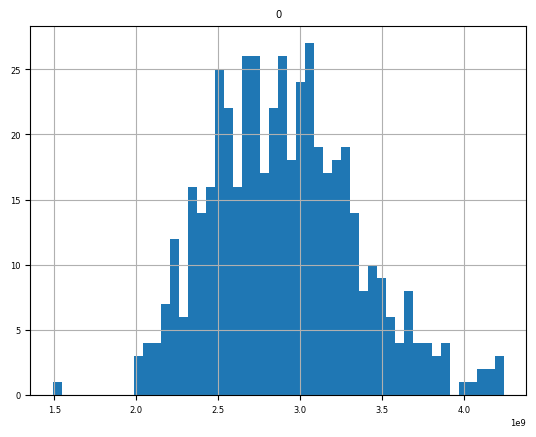

In [9]:
phi.hist(bins=50)

In [ ]:
'actet_mean_mon'.endswith

In [10]:
pst.obs_groups

['actet_mean_mon',
 'actet_mon',
 'recharge_ann',
 'runoff_mon',
 'sca_daily',
 'soil_moist_ann',
 'soil_moist_mon',
 'streamflow_daily',
 'streamflow_mean_mon',
 'streamflow_mon']

## read in the observations ensemble from the Prior MC

In [53]:
obens = pd.read_csv(results_dir  / 'prior_mc_better.0.obs.csv', low_memory=False, index_col=0)

In [95]:
obens.T

real_name,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,base
actet_mean_mon:10:5621,0.085325,0.018091,0.095523,0.082083,0.087386,0.000000,0.000000,0.143268,0.000000,0.085372,...,0.000000,0.000000,0.073770,0.031166,0.181966,0.000000,0.000000,0.110098,0.000000,0.058838
actet_mean_mon:10:5625,0.155037,0.025753,0.000000,0.058013,0.025212,0.000000,0.149208,0.101985,0.000000,0.000000,...,0.169773,0.000000,0.000000,0.043719,0.000000,0.000000,0.000000,0.000000,0.081243,0.052692
actet_mean_mon:10:5628,0.000000,0.000000,0.000000,0.128103,0.000000,0.000000,0.079219,0.000000,0.091129,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262435,0.134492,0.000000,0.065150
actet_mean_mon:10:5635,0.166428,0.000000,0.000000,0.000000,0.128500,0.300872,0.026126,0.057096,0.114465,0.126610,...,0.000000,0.000000,0.074678,0.000000,0.000000,0.019297,0.265025,0.000000,0.117214,0.066253
actet_mean_mon:10:5637,0.000000,0.107993,0.028942,0.202741,0.040382,0.108472,0.000000,0.200678,0.112922,0.000000,...,0.000000,0.129086,0.052197,0.000000,0.000000,0.000000,0.000000,0.184142,0.205830,0.063878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
streamflow_mon:2010_9:01472198,50.345200,85.325000,125.395000,73.679400,32.048700,23.631600,74.053100,77.444800,14.667500,29.913300,...,95.431000,66.892200,12.063300,145.870000,74.891700,96.014600,132.181000,66.456200,100.341000,48.638000
streamflow_mon:2010_9:01472199,1.580130,71.075900,22.872200,28.646900,81.293900,10.282000,15.509200,17.597400,52.845700,3.749040,...,84.132500,5.542700,19.793100,1.337520,54.080400,108.441000,3.980740,34.420800,125.753000,34.822500
streamflow_mon:2010_9:01472620,5.513510,14.627600,40.818300,28.271000,16.755400,51.904400,22.067500,4.089260,30.806600,8.731290,...,36.161900,9.329990,12.947700,0.449198,8.498380,14.151400,18.131600,8.265420,7.530730,19.126700
streamflow_mon:2010_9:01472810,55.661000,174.247000,308.085000,65.144600,225.999000,59.202900,130.851000,89.445000,93.477600,31.292800,...,104.400000,48.341600,94.244000,59.576900,62.711100,49.879300,108.519000,40.516700,20.843100,70.778500


In [93]:
def plot_o_matic(obs_df, obens_df, curr_group, fig_dir):
    # some metdata
    plot_lw = 0.01
    plot_alpha = 0.15
    
    ### TODO: purge the zero padding garbage once we put it in the original construction code!!!!
    print(f'postprocessing group: {curr_group}')
    # get a list of all the obs names in the group
    curr_obs = obs.loc[obs.obgnme==curr_group,'obsnme'].to_list()
    # truncate the ensemble data
    curr_obs_df = obens[curr_obs].T.copy()
    # parse the obs names for useful metadata
    curr_obs_df['obs_location'] = [i.split(':')[-1] for i in curr_obs_df.index]
    curr_obs_df['datestring'] = [i.split(':')[1] for i in curr_obs_df.index]
    # get the obsval for plotting
    curr_obs_df = curr_obs_df.merge(obs['obsval'], left_index=True, right_index=True)
    # parse based on the meas freq
    if ('mon' in curr_group) & ('mean' not in curr_group):
        curr_obs_df['datestring'] = [f'{int(i.split("_")[0]):4d}_{int(i.split("_")[1]):02d}' 
                     for i in curr_obs_df['datestring']]   
        curr_obs_df['datetime'] = [dt.strptime(i, datfmtmon) for i in curr_obs_df['datestring']]
        with PdfPages(fig_dir / f'{curr_group}.pdf') as outpdf:
            for cn, cg in curr_obs_df.groupby('obs_location'):
                plt.figure()
                cgplot = cg.set_index(cg.datetime)
                cgplot = cgplot[cgplot.columns[:-4]]
                ax = cgplot.plot(legend=None, linewidth=plot_lw, color='grey', alpha = plot_alpha)
                cg.set_index(cg.datetime).obsval.plot(ax=ax, color='orange')
                ax.set_title(f'location = {cn}')
                outpdf.savefig()
                plt.close('all')
            
    elif 'mean_mon' in curr_group:
        curr_obs_df['month'] = [int(i.split(':')[1]) for i in curr_obs_df.index]
        with PdfPages(fig_dir / f'{curr_group}.pdf') as outpdf:
            for cn, cg in curr_obs_df.groupby('obs_location'):
                plt.figure()
                cgplot = cg.sort_values(by='month')
                cgplot = cgplot.set_index('month')
                ax = cgplot.plot(legend=None, linewidth=plot_lw, color='grey', alpha = plot_alpha)
                cg.sort_values(by='month').set_index('month').obsval.plot(ax=ax, color='orange')
                ax.set_title(f'location = {cn}')
                outpdf.savefig()
                plt.close('all')
            
    elif 'ann' in curr_group:
        curr_obs_df['year'] = [int(i.split(':')[1]) for i in curr_obs_df.index]
        with PdfPages(fig_dir / f'{curr_group}.pdf') as outpdf:
            for cn, cg in curr_obs_df.groupby('obs_location'):
                plt.figure()
                cgplot = cg.sort_values(by='year')
                cgplot = cgplot.set_index('year')
                ax = cgplot.plot(legend=None, linewidth=plot_lw, color='grey', alpha = plot_alpha)
                cg.sort_values(by='year').set_index('year').obsval.plot(ax=ax, color='orange')
                ax.set_title(f'location = {cn}')
                outpdf.savefig()
                plt.close('all')
    elif 'daily' in curr_group:
        curr_obs_df['datestring'] = [f'{int(i.split("_")[0]):4d}_{int(i.split("_")[1]):02d}_{int(i.split("_")[2]):02d}' 
                             for i in curr_obs_df['datestring']]
        curr_obs_df['datetime'] = [dt.strptime(i, datfmtdaily) for i in curr_obs_df['datestring']]
        curr_obs_df['year'] = [ int(i.split("_")[0])  for i in curr_obs_df.datestring]
        group_root = curr_group.replace('_daily','')
        for cn, cg in curr_obs_df.groupby('obs_location'):
            print(f'subpostprocessing location: {cn}')
            with PdfPages(fig_dir / f'{group_root}_{cn}.pdf') as outpdf:
                cg = cg.sort_values(by='year')
                for cn2, cg2 in cg.groupby('year'):
                    plt.figure()
                    cgplot = cg2.set_index('datetime')[cg2.columns[:-5]]
                    ax = cgplot.plot(legend=None, linewidth=plot_lw, color='grey', alpha = plot_alpha)
                    cg2.set_index('datetime').obsval.plot(ax=ax, color='orange')
                    ax.set_title(f'year = {cn2}')
                    outpdf.savefig()
                    plt.close('all')

In [94]:
# run them all at once
[plot_o_matic(obs, obens, curr_group, fig_dir) for curr_group in pst.obs_groups];

postprocessing group: actet_mean_mon
postprocessing group: actet_mon
postprocessing group: recharge_ann
postprocessing group: runoff_mon
postprocessing group: sca_daily
subpostprocessing location: 5621
subpostprocessing location: 5625
subpostprocessing location: 5628
subpostprocessing location: 5635
subpostprocessing location: 5637
subpostprocessing location: 5643
subpostprocessing location: 5678
subpostprocessing location: 5679
subpostprocessing location: 5686
subpostprocessing location: 5690
subpostprocessing location: 5693
subpostprocessing location: 5697
subpostprocessing location: 5703
subpostprocessing location: 5728
subpostprocessing location: 7128
subpostprocessing location: 7156
subpostprocessing location: 7157
postprocessing group: soil_moist_ann
postprocessing group: soil_moist_mon
postprocessing group: streamflow_daily
subpostprocessing location: 01472198
subpostprocessing location: 01472199
subpostprocessing location: 01472620
subpostprocessing location: 01472810
subpostpr

[None, None, None, None, None, None, None, None, None, None]